In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

print(tf.__version__)

2.4.1


In [3]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Error [MPG]')
  plt.legend()
  plt.grid(True)

In [4]:
raw_dataset = pd.read_csv("all_matches_numeric.csv")

dataset = raw_dataset.copy()
dataset.tail()



,innings,ball,runs,venue_mean,count_batsmen,count_bowlers,batsmen_mean,bowlers_mean
1619,2,5.6,49,38.333333,3,4,1.134776,1.268253
1620,1,5.6,39,45.503401,3,4,1.204281,1.168330
1621,2,5.6,45,45.503401,3,4,1.057421,1.296849
1622,1,5.6,36,46.406780,4,4,1.183557,1.343333
1623,2,5.6,40,46.406780,3,2,1.085704,1.370389


In [36]:
number_sample = len(dataset)
train_dataset = dataset[:int(0.8*number_sample)]
test_dataset = dataset[int(0.8*number_sample):]

In [37]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('runs')
test_labels = test_features.pop('runs')

In [38]:
normalizer = preprocessing.Normalization()
normalizer.adapt(np.array(train_features))

In [98]:
def build_and_compile_model(norm):
  model = keras.Sequential([
      norm,
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(1)
  ])

  model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
  return model

In [140]:
dnn_model = build_and_compile_model(normalizer)

In [141]:
%%time
history = dnn_model.fit(
    train_features, train_labels,
    verbose=2, epochs=30)

Epoch 1/30
41/41 - 0s - loss: 44.7978
Epoch 2/30
41/41 - 0s - loss: 38.4415
Epoch 3/30
41/41 - 0s - loss: 22.6225
Epoch 4/30
41/41 - 0s - loss: 10.5558
Epoch 5/30
41/41 - 0s - loss: 9.7181
Epoch 6/30
41/41 - 0s - loss: 9.2424
Epoch 7/30
41/41 - 0s - loss: 8.9165
Epoch 8/30
41/41 - 0s - loss: 8.6878
Epoch 9/30
41/41 - 0s - loss: 8.4695
Epoch 10/30
41/41 - 0s - loss: 8.3019
Epoch 11/30
41/41 - 0s - loss: 8.1883
Epoch 12/30
41/41 - 0s - loss: 8.0464
Epoch 13/30
41/41 - 0s - loss: 7.9485
Epoch 14/30
41/41 - 0s - loss: 7.8883
Epoch 15/30
41/41 - 0s - loss: 7.7813
Epoch 16/30
41/41 - 0s - loss: 7.7090
Epoch 17/30
41/41 - 0s - loss: 7.6790
Epoch 18/30
41/41 - 0s - loss: 7.6135
Epoch 19/30
41/41 - 0s - loss: 7.5733
Epoch 20/30
41/41 - 0s - loss: 7.5321
Epoch 21/30
41/41 - 0s - loss: 7.5307
Epoch 22/30
41/41 - 0s - loss: 7.4937
Epoch 23/30
41/41 - 0s - loss: 7.4913
Epoch 24/30
41/41 - 0s - loss: 7.4410
Epoch 25/30
41/41 - 0s - loss: 7.3808
Epoch 26/30
41/41 - 0s - loss: 7.3652
Epoch 27/30
41/41

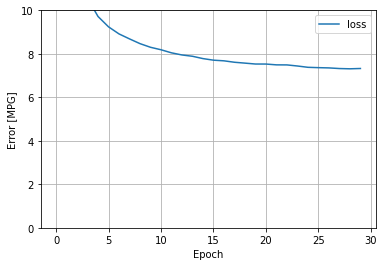

In [142]:
plot_loss(history)

In [143]:
test_results = {}

test_results['dnn_model'] = dnn_model.evaluate(
    test_features,
    test_labels, verbose=2)

11/11 - 0s - loss: 8.1634


In [145]:
test_results['dnn_model'] = dnn_model.evaluate(test_features, test_labels, verbose=2)

11/11 - 0s - loss: 8.1634


In [146]:
dnn_model.save('dnn_model')

INFO:tensorflow:Assets written to: dnn_model\assets
